In [10]:
import pandas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy
import graphviz

#reading in data and cleaning up data

Telco = pandas.read_csv('Telco_Customer.csv')
Telco

Telco_copy = Telco

Telco_copy['TotalCharges'].replace(r'\s+', numpy.nan, regex = True, inplace=True)
Telco_copy['TotalCharges'] = pandas.to_numeric(Telco_copy['TotalCharges'])
T_mean = Telco_copy['TotalCharges'].mean()
Telco_copy['TotalCharges'] = Telco_copy['TotalCharges'].fillna(T_mean)


Telco_copy = pandas.get_dummies(Telco_copy, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',\
                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', \
             'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',])
Telco_copy.columns

#moving churn to index 1
churn = Telco_copy.pop('Churn')
# cID = Telco_copy.pop('customerID')
Telco_copy.insert(loc=1, column='Churn', value=churn)
#Telco_copy['Churn']=churn
cols = Telco_copy.columns.tolist()
cols


['customerID',
 'Churn',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',


In [72]:
#initial attempt at predictors column

#predictors = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',\
#                 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', \
 #            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [77]:
#splitting into a test and training set
(train_data, test_data) = train_test_split(Telco_copy, test_size = 0.2)

#initializing our Random Forest classifier
rf = RandomForestClassifier(max_features = 7)

#we'll use all columns as predictors except for id, the target (diagnosis), and the Unnamed column at the end which is blank and probably not meant to be there
#breast_cancer_data.columns will give a list of the column names, so we just slice out the ones we want
predictors = Telco_copy.columns[2:-1]
target = 'Churn'
print("Using these predictors:",predictors)
print("Using this target:",target)


#training the forest on the the training data
rf.fit(train_data[predictors],train_data[target])

#get predictors for the test data
rf_predictions = rf.predict(test_data[predictors])


print("accuracy:",metrics.accuracy_score(test_data[target],rf_predictions))
print("confusion matrix:\n",metrics.confusion_matrix(test_data[target],rf_predictions))


Using these predictors: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

In [59]:
rf.feature_importances_

array([ 0.01857201,  0.12936044,  0.14247513,  0.16680989,  0.01683787,
        0.01746209,  0.0133171 ,  0.01256434,  0.01265155,  0.01280238,
        0.01421396,  0.0143458 ,  0.01350273,  0.03325498,  0.04594298,
        0.01131195,  0.01550256,  0.0115527 ,  0.01852926,  0.01165497,
        0.02443239,  0.00950418,  0.01120101,  0.01052469,  0.01120649,
        0.01050955,  0.01230124,  0.05854444,  0.00877486,  0.02155568,
        0.01405679,  0.01688398,  0.01454997,  0.0156592 ,  0.02763083])

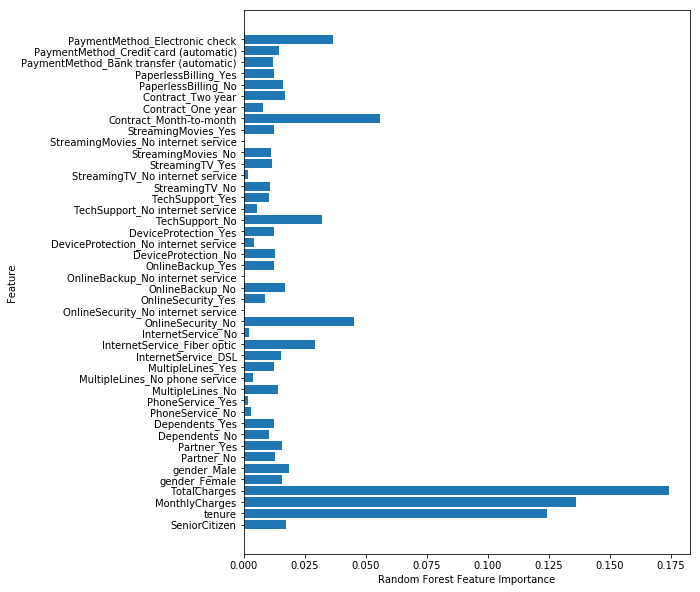

In [12]:
index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,rf.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [146]:
#dropping variables was attempted, but not helpful

#Telco_copy.pop('StreamingMovies_No internet service')
#Telco_copy.pop('TechSupport_No internet service')
#Telco_copy.pop('OnlineSecurity_No internet service')
#Telco_copy.pop('InternetService_No')
#Telco_copy.pop('OnlineBackup_No internet service')
#Telco_copy.pop('DeviceProtection_No internet service')
#Telco_copy.pop('PhoneService_No')
#Telco_copy.pop('PhoneService_Yes')

#drop if needed

#Telco_copy.pop('MultipleLines_No phone service')
#Telco_copy.pop('Partner_No')
#Telco_copy.pop('Partner_Yes')
#Telco_copy.pop('InternetService_DSL')
#Telco_copy.pop('StreamingTV_No internet service')
#Telco_copy.pop('Dependents_Yes')
#Telco_copy.pop('TechSupport_Yes')
        
Telco_copy.columns

Index(['customerID', 'Churn', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Dependents_No',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

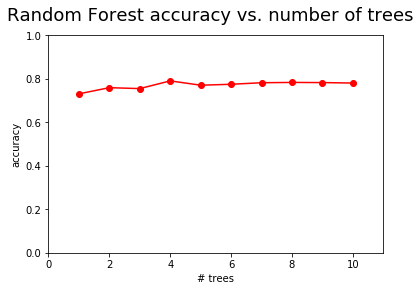

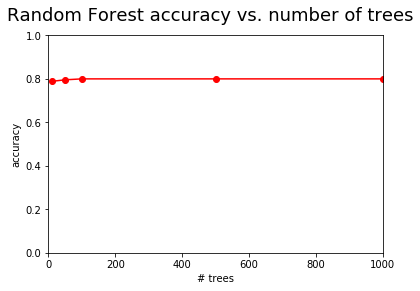

In [34]:
#This function just loops through a series of n_estimator values, builds a different model
#for each, and then plots their respective accuracies. By making it a function, it's easier
#to try out different ranges of numbers
def tune_number_of_trees(n_estimator_values):
    rf_accuracies = []

    for n in n_estimator_values:

        curr_rf = RandomForestClassifier(n_estimators=n)
        curr_rf.fit(train_data[predictors],train_data[target])
        curr_predictions = curr_rf.predict(test_data[predictors])
        curr_accuracy = metrics.accuracy_score(test_data[target],curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. number of trees',fontsize=18)
    plt.xlabel('# trees')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,rf_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,0,1])

    plt.show()
    
tune_number_of_trees([1,2,3,4,5,6,7,8,9,10])
tune_number_of_trees([10,50,100,500,1000])

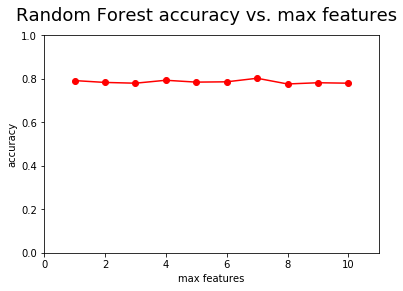

In [73]:
def tune_max_features(max_features_values):
    rf_accuracies = []

    for m in max_features_values:

        curr_rf = RandomForestClassifier(n_estimators=10,max_features=m)
        curr_rf.fit(train_data[predictors],train_data[target])
        curr_predictions = curr_rf.predict(test_data[predictors])
        curr_accuracy = metrics.accuracy_score(test_data[target],curr_predictions)
        rf_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. max features',fontsize=18)
    plt.xlabel('max features')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,rf_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,0,1])

    plt.show()
    
tune_max_features([1,2,3,4,5,6,7,8,9,10])

In [33]:
(train_data, test_data) = train_test_split(Telco_copy, test_size = 0.2)

dt = tree.DecisionTreeClassifier(max_depth = 3)

predictors = Telco_copy.columns[2:-1]

dt.fit(train_data[predictors],train_data[target])

Telco_predictions = dt.predict(test_data[predictors])
print(Telco_predictions)

print(test_data['Churn'])

print(metrics.accuracy_score(test_data['Churn'],Telco_predictions))
print(metrics.confusion_matrix(test_data['Churn'],Telco_predictions))

['No' 'No' 'No' ..., 'Yes' 'No' 'Yes']
5225     No
1590     No
2479     No
4202     No
983     Yes
4135     No
5527     No
4070     No
1100     No
3280     No
6125    Yes
6911     No
5319     No
4944     No
4238     No
6078     No
6916     No
1970    Yes
2391     No
2334     No
6673     No
1713     No
2132     No
2920     No
348      No
1120     No
6455     No
6887     No
4776     No
1928    Yes
       ... 
4527    Yes
5251    Yes
5993     No
6755     No
2294    Yes
6340     No
4498     No
4735     No
828     Yes
6783     No
870      No
3640    Yes
975     Yes
4386    Yes
1947     No
3698     No
1982     No
6432     No
1773     No
1358     No
2496     No
6605    Yes
3966     No
4301     No
1631    Yes
56       No
4940     No
5003    Yes
1331     No
474     Yes
Name: Churn, Length: 1409, dtype: object
0.806955287438
[[993  57]
 [215 144]]


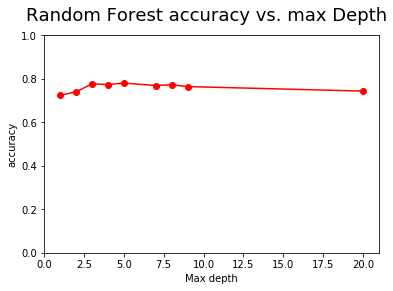

In [32]:

def tune_max_d_tree(max_features_values):
    dt_accuracies = []

    for m in max_features_values:

        curr_dt =  tree.DecisionTreeClassifier(max_depth = m)
        curr_dt.fit(train_data[predictors],train_data[target])
        curr_predictions = curr_dt.predict(test_data[predictors])
        curr_accuracy = metrics.accuracy_score(test_data[target],curr_predictions)
        dt_accuracies.append(curr_accuracy)


    plt.suptitle('Random Forest accuracy vs. max Depth',fontsize=18)
    plt.xlabel('Max depth')
    plt.ylabel('accuracy')
    plt.plot(max_features_values,dt_accuracies,'ro-')
    plt.axis([0,max_features_values[-1]+1,0,1])

    plt.show()
    
tune_max_d_tree([1,2,3,4,5,7,8,9,20])

In [106]:
(train_data, test_data) = train_test_split(Telco_copy, test_size = 0.2)

knn = KNeighborsClassifier(n_neighbors = 11)

predictors = Telco_copy.columns[2:-1]

knn.fit(train_data[predictors],train_data[target])

Telco_predictions = knn.predict(test_data[predictors])
print(Telco_predictions)

print(test_data['Churn'])

k_accuracy = metrics.accuracy_score(test_data['Churn'],Telco_predictions)
print(k_accuracy)
print(metrics.confusion_matrix(test_data['Churn'],Telco_predictions))

['No' 'No' 'No' ..., 'No' 'No' 'No']
3037     No
2664     No
3200    Yes
3744     No
3922     No
3509     No
918      No
2557     No
4776     No
4137     No
6095     No
688      No
4458    Yes
754      No
2100     No
3888    Yes
3213     No
4329    Yes
694      No
2191    Yes
585     Yes
6461     No
947      No
1478    Yes
3419     No
5627     No
3251    Yes
5973     No
4908    Yes
6579     No
       ... 
660     Yes
5582     No
1677     No
2875    Yes
1560     No
6725     No
414      No
6489    Yes
3074     No
6321    Yes
1439    Yes
1450     No
6653     No
1892     No
6902     No
2127    Yes
2344     No
1004     No
2137     No
1285    Yes
6341    Yes
3577    Yes
604      No
4416     No
5736     No
1462     No
4757    Yes
2216     No
2074    Yes
1200     No
Name: Churn, Length: 1409, dtype: object
0.785663591199
[[934  88]
 [214 173]]


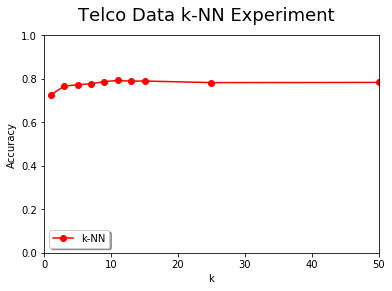

In [95]:
#k-nn parameter tuning

k_vals = [1,3,5,7,9,11,13,15,25,50]


k_accuracy = []


for k in k_vals:
    #predictions = regression_all_kNN(test_data,train_data,k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data[predictors],train_data['Churn'])
    Telco_predictions = knn.predict(test_data[predictors])

    current_accuracy = metrics.accuracy_score(test_data['Churn'],Telco_predictions)
    
    k_accuracy.append(current_accuracy)


plt.suptitle('Telco Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(k_vals,k_accuracy,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,50,0,1])

plt.show()

In [68]:
#creation of linear model, perceptron
(train_data, test_data) = train_test_split(Telco_copy, test_size = 0.2)

perc = Perceptron(max_iter = 80) 

predictors = Telco_copy.columns[2:-1]

perc.fit(train_data[predictors],train_data[target])

Telco_predictions = dt.predict(test_data[predictors])
print(Telco_predictions)

print(test_data['Churn'])

print(metrics.accuracy_score(test_data['Churn'],Telco_predictions))
print(metrics.confusion_matrix(test_data['Churn'],Telco_predictions))

['No' 'No' 'No' ..., 'No' 'No' 'No']
3558     No
979      No
1094     No
295      No
1191     No
4055     No
6507    Yes
1163    Yes
3292     No
6060     No
6117     No
2721    Yes
1353     No
2181     No
6731     No
3529     No
3169     No
6564     No
6727     No
6313    Yes
1385     No
1506     No
4534     No
1771    Yes
6756     No
2872     No
3520     No
6024    Yes
6390     No
935      No
       ... 
6576     No
2056     No
1474     No
2616    Yes
3560     No
1303     No
6190    Yes
645     Yes
2604     No
6506    Yes
5117     No
6128     No
4535    Yes
5754     No
2015     No
4725    Yes
6244     No
2299     No
1602    Yes
6033    Yes
3771    Yes
1074     No
4437     No
5405     No
3650     No
4320     No
3274     No
4861     No
5518    Yes
556      No
Name: Churn, Length: 1409, dtype: object
0.80269694819
[[982  66]
 [212 149]]


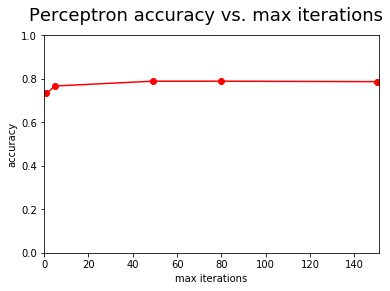

In [67]:
#parameter tuning for perceptron with max iterations

def tune_perc(n_estimator_values):
    perc_accuracies = []

    for n in n_estimator_values:

        curr_perc = RandomForestClassifier(n_estimators=n)
        curr_perc.fit(train_data[predictors],train_data[target])
        curr_predictions = curr_perc.predict(test_data[predictors])
        curr_accuracy = metrics.accuracy_score(test_data[target],curr_predictions)
        perc_accuracies.append(curr_accuracy)


    plt.suptitle('Perceptron accuracy vs. max iterations',fontsize=18)
    plt.xlabel('max iterations')
    plt.ylabel('accuracy')
    plt.plot(n_estimator_values,perc_accuracies,'ro-')
    plt.axis([0,n_estimator_values[-1]+1,0,1])

    plt.show()
    

tune_perc([1,5,49,80,150])

In [70]:
Telco_copy

,customerID,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,No,0,1,29.85,29.85,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,No,0,34,56.95,1889.50,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Yes,0,2,53.85,108.15,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,No,0,45,42.30,1840.75,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Yes,0,2,70.70,151.65,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,Yes,0,8,99.65,820.50,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,1452-KIOVK,No,0,22,89.10,1949.40,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
7,6713-OKOMC,No,0,10,29.75,301.90,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,7892-POOKP,Yes,0,28,104.80,3046.05,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,6388-TABGU,No,0,62,56.15,3487.95,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
